# Предобработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from pandas import read_excel, DataFrame, Series
from numpy.random import seed
from scipy import stats
import warnings
import csv
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('Datasets/df_full.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [6]:
# Получим описательную статистику и транспонируем для удобства доступа к названиям колонок.
a =df.describe()
a.T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

### Удаление выбросов

Пропуски в данных отсутствуют. Значит, сразу приступаем к работе с выбросами
Шаг 1 Удаление выбросов. Посчитаем, сколько значений у нас в каждом столбце выбивающихся из распределения.

In [7]:
df.shape

(1023, 13)

In [8]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Количество выбросов в столбце  Соотношение матрица-наполнитель :  6
Количество выбросов в столбце  Плотность, кг/м3 :  9
Количество выбросов в столбце  модуль упругости, ГПа :  2
Количество выбросов в столбце  Количество отвердителя, м.% :  14
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  2
Количество выбросов в столбце  Температура вспышки, С_2 :  8
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  2
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  6
Количество выбросов в столбце  Прочность при растяжении, МПа :  11
Количество выбросов в столбце  Потребление смолы, г/м2 :  8
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  4
Количество выбросов в столбце  Плотность нашивки :  21


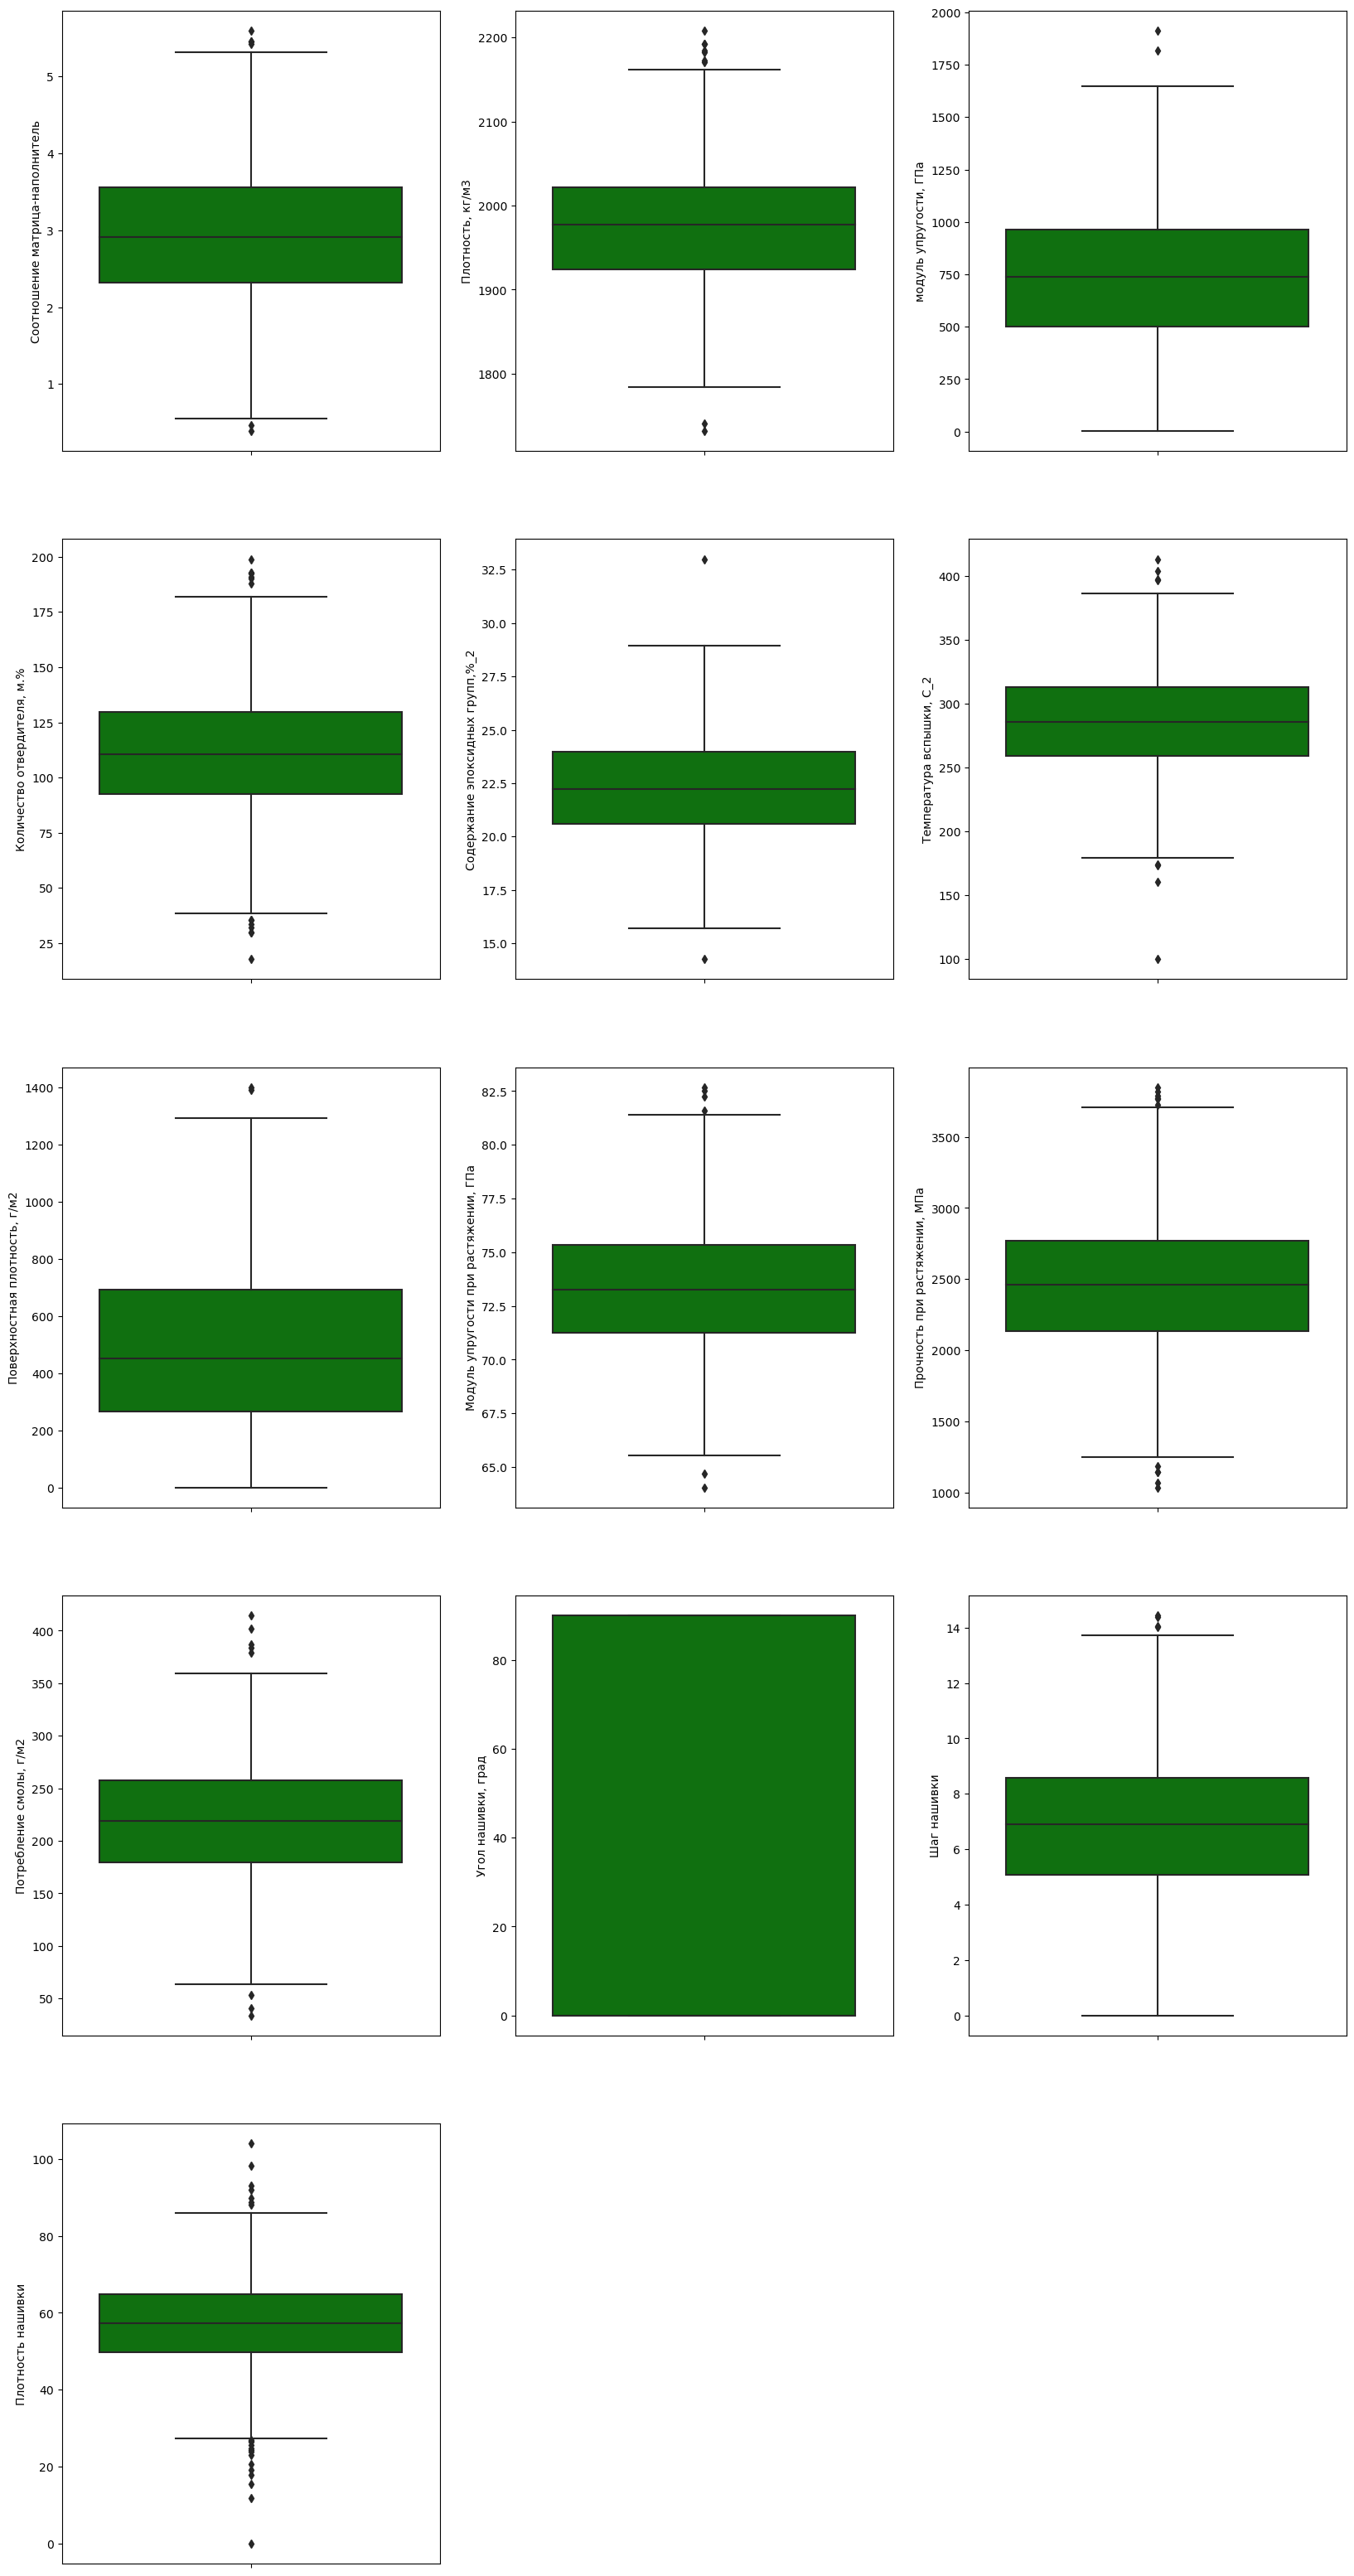

In [9]:
# оценка наличия,количества выбросов в столбцах исходного dataset
plt.figure(figsize=(20, 40))
i=1 
for name in df.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=df[name], color = 'g')
    outlier = boxplot_stats(df[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

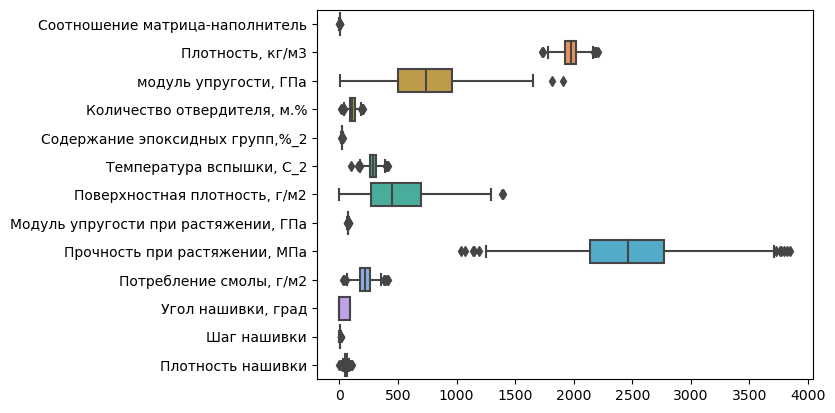

In [10]:
sns.boxplot(data = df, orient="h")
plt.show()

Для удаления выбросов существует 2 основных метода - метод 3-х сигм и межквартильных расстояний

In [11]:
metod_3s = 0
metod_iq = 0
count_iq = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
count_3s = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма.
for column in df:
    d = df.loc[:, [column]]
# методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    metod_3s += d['3s'].sum()
    count_3s.append(d['3s'].sum())
print(column,'3s', ': ', d['3s'].sum())
# методом межквартильных расстояний
q1 = np.quantile(df[column], 0.25)
q3 = np.quantile(df[column], 0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
d['iq'] = (df[column] <= lower) | (df[column] >= upper)
metod_iq += d['iq'].sum()
count_iq.append(d['iq'].sum())
print(column, ': ', d['iq'].sum())
print('Метод 3-х сигм, выбросов:', metod_3s)
print('Метод межквартильных расстояний, выбросов:', metod_iq)


Плотность нашивки 3s :  7
Плотность нашивки :  21
Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 21


Так же для удаления выбросов можно использовать вот эту формулу, но мне привычней вариант выше

Посмотрим на сумму выбросов по каждому из столбцов

In [12]:
# удаление аномалий из исходного dataset

df_clean = df.copy()
print(df_clean.shape)
for name in df_clean.columns:
    outlier = boxplot_stats(df_clean[name])
    High = outlier[0]['whishi']
    Low =  outlier[0]['whislo']
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    df_clean = df_clean[~((df_clean[name] < Low) | (df_clean[name] > High))]
print(df_clean.shape)  

(1023, 13)
Количество выбросов в столбце  Соотношение матрица-наполнитель :  6
Количество выбросов в столбце  Плотность, кг/м3 :  9
Количество выбросов в столбце  модуль упругости, ГПа :  2
Количество выбросов в столбце  Количество отвердителя, м.% :  14
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  2
Количество выбросов в столбце  Температура вспышки, С_2 :  6
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  2
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  5
Количество выбросов в столбце  Прочность при растяжении, МПа :  14
Количество выбросов в столбце  Потребление смолы, г/м2 :  5
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  4
Количество выбросов в столбце  Плотность нашивки :  22
(932, 13)


Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  0
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  1
Количество выбросов в столбце  Потребление смолы, г/м2 :  0
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  2


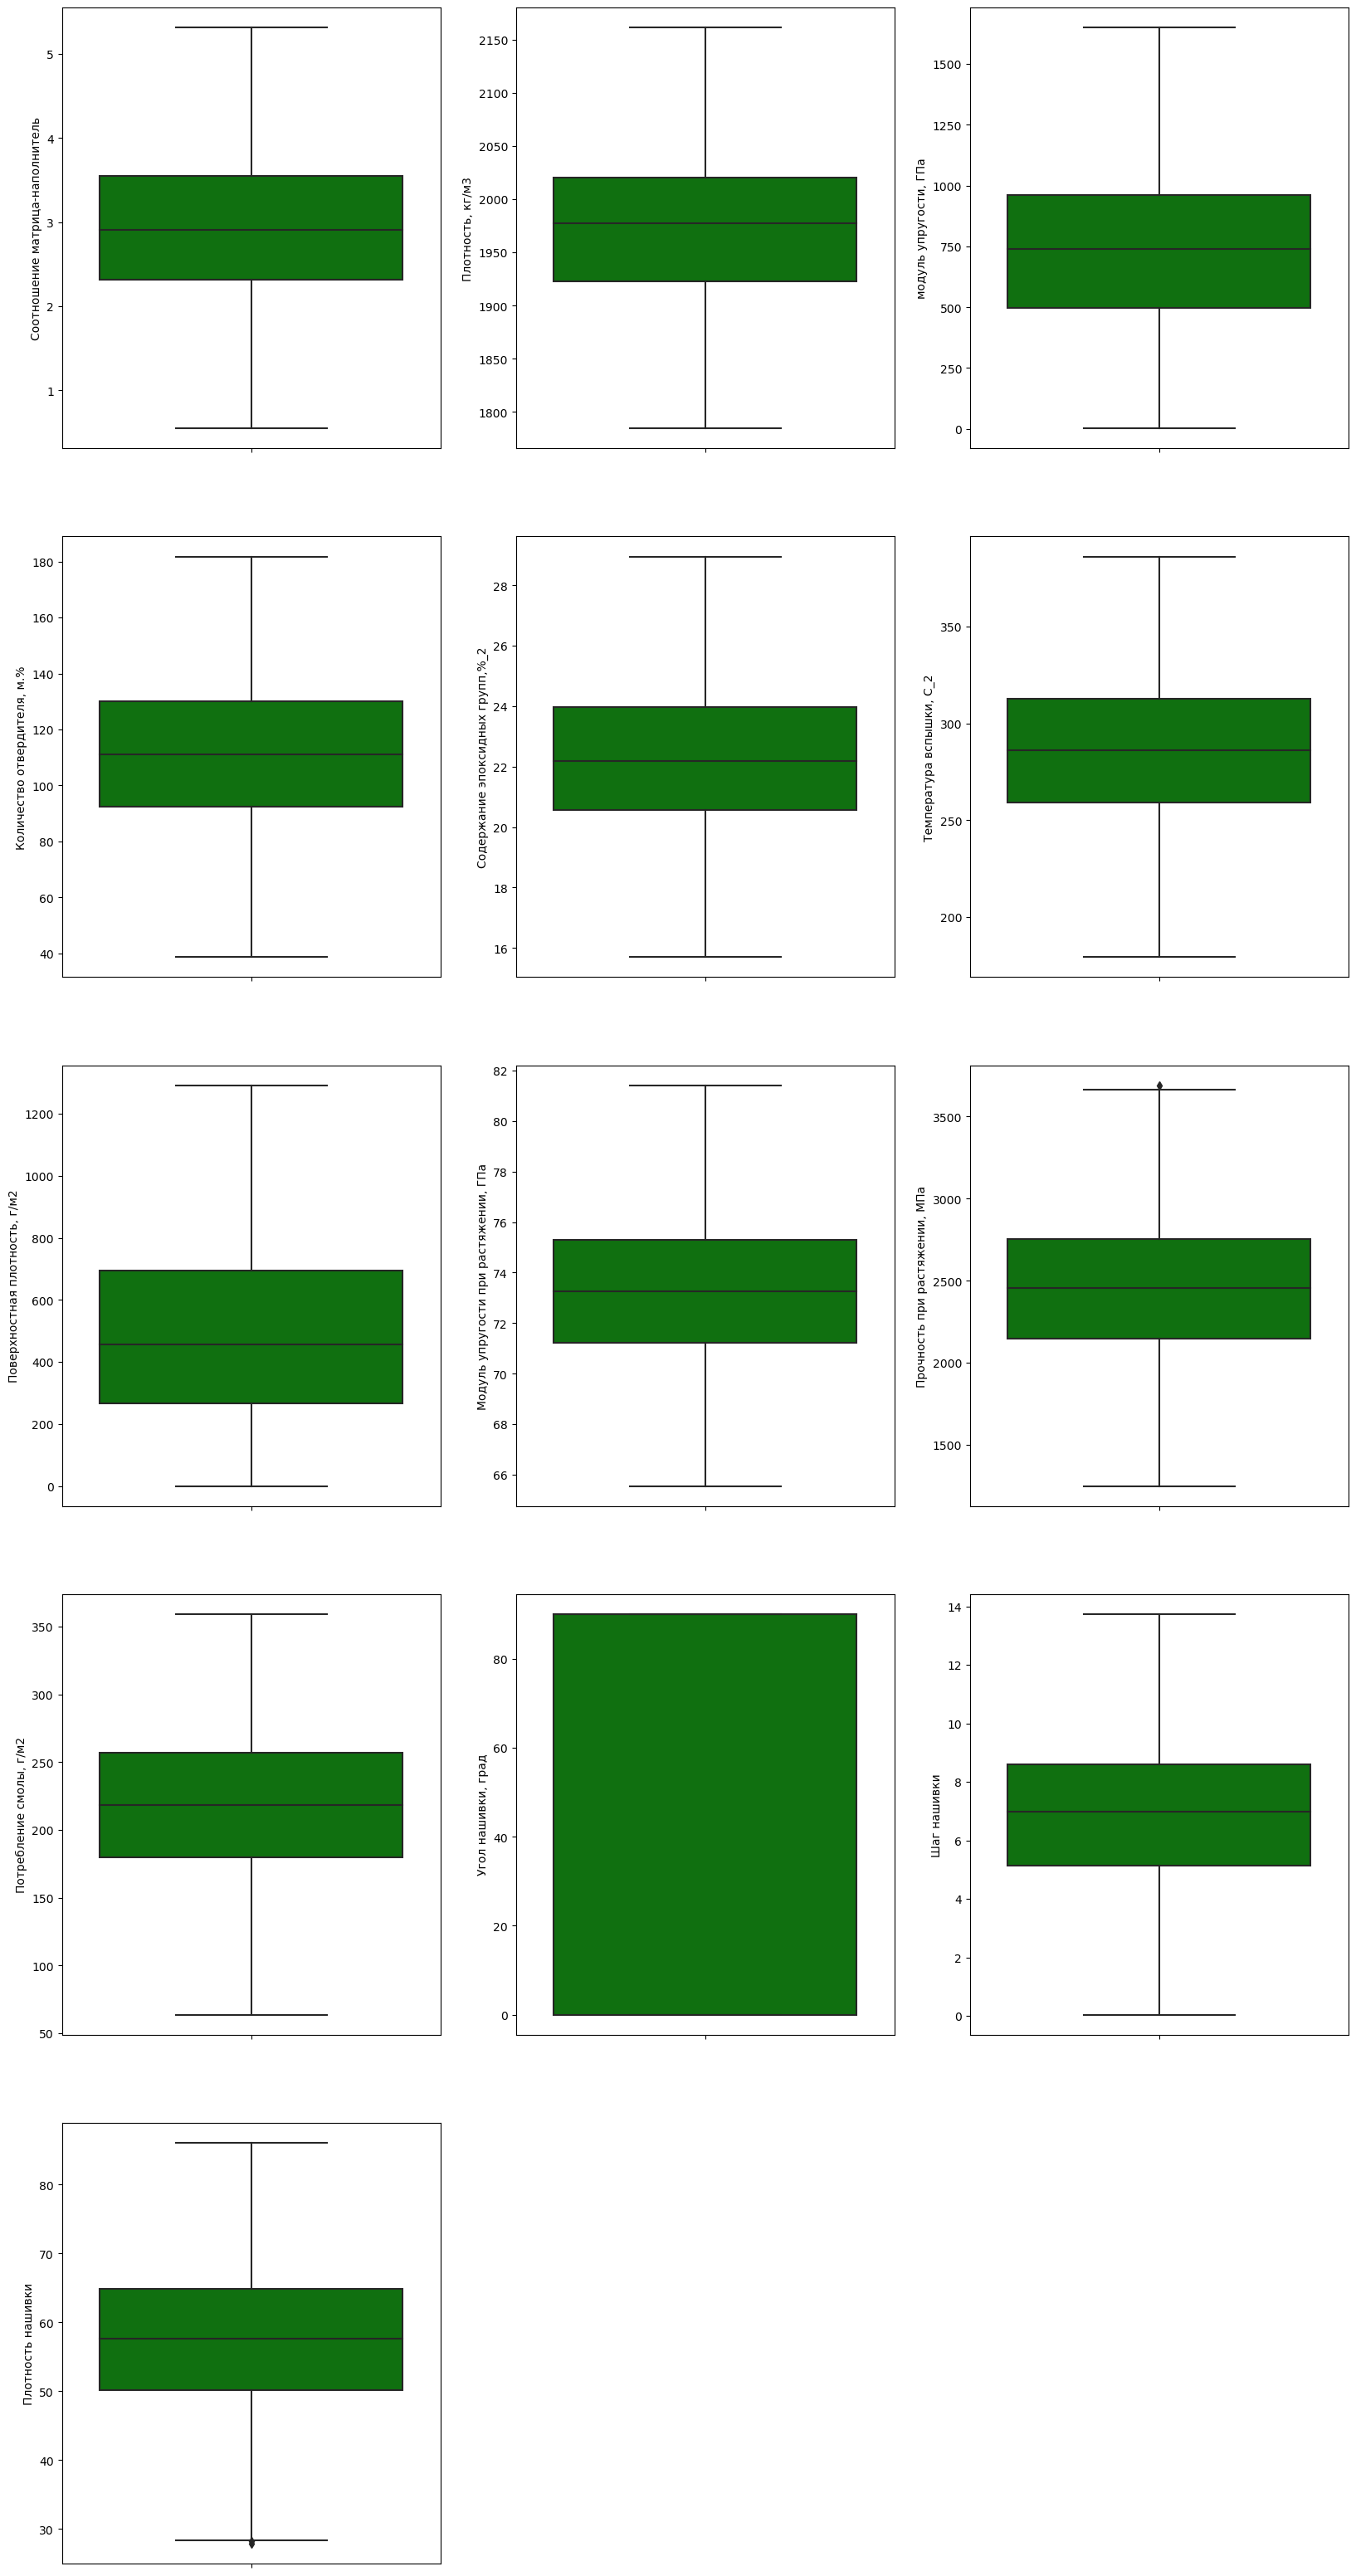

In [13]:
# оценка наличия выбросов и аномальных значений, а также их количества в столбцах очищенного 1 раз датасета
plt.figure(figsize=(20, 40))
i=1 
for name in df_clean.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=df_clean[name], color = 'g')
    outlier = boxplot_stats(df_clean[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

In [14]:
# Осталось небольшое количество выбросов, сделаем очистку 2 раз
print(df_clean.shape)
for name in df_clean.columns:
    outlier = boxplot_stats(df_clean[name])
    High = outlier[0]['whishi']
    Low =  outlier[0]['whislo']
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    df_clean = df_clean[~((df_clean[name] < Low) | (df_clean[name] > High))]
print(df_clean.shape) 

(932, 13)
Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  0
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  1
Количество выбросов в столбце  Потребление смолы, г/м2 :  1
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  3
(927, 13)


Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  1
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  2
Количество выбросов в столбце  Потребление смолы, г/м2 :  0
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  0


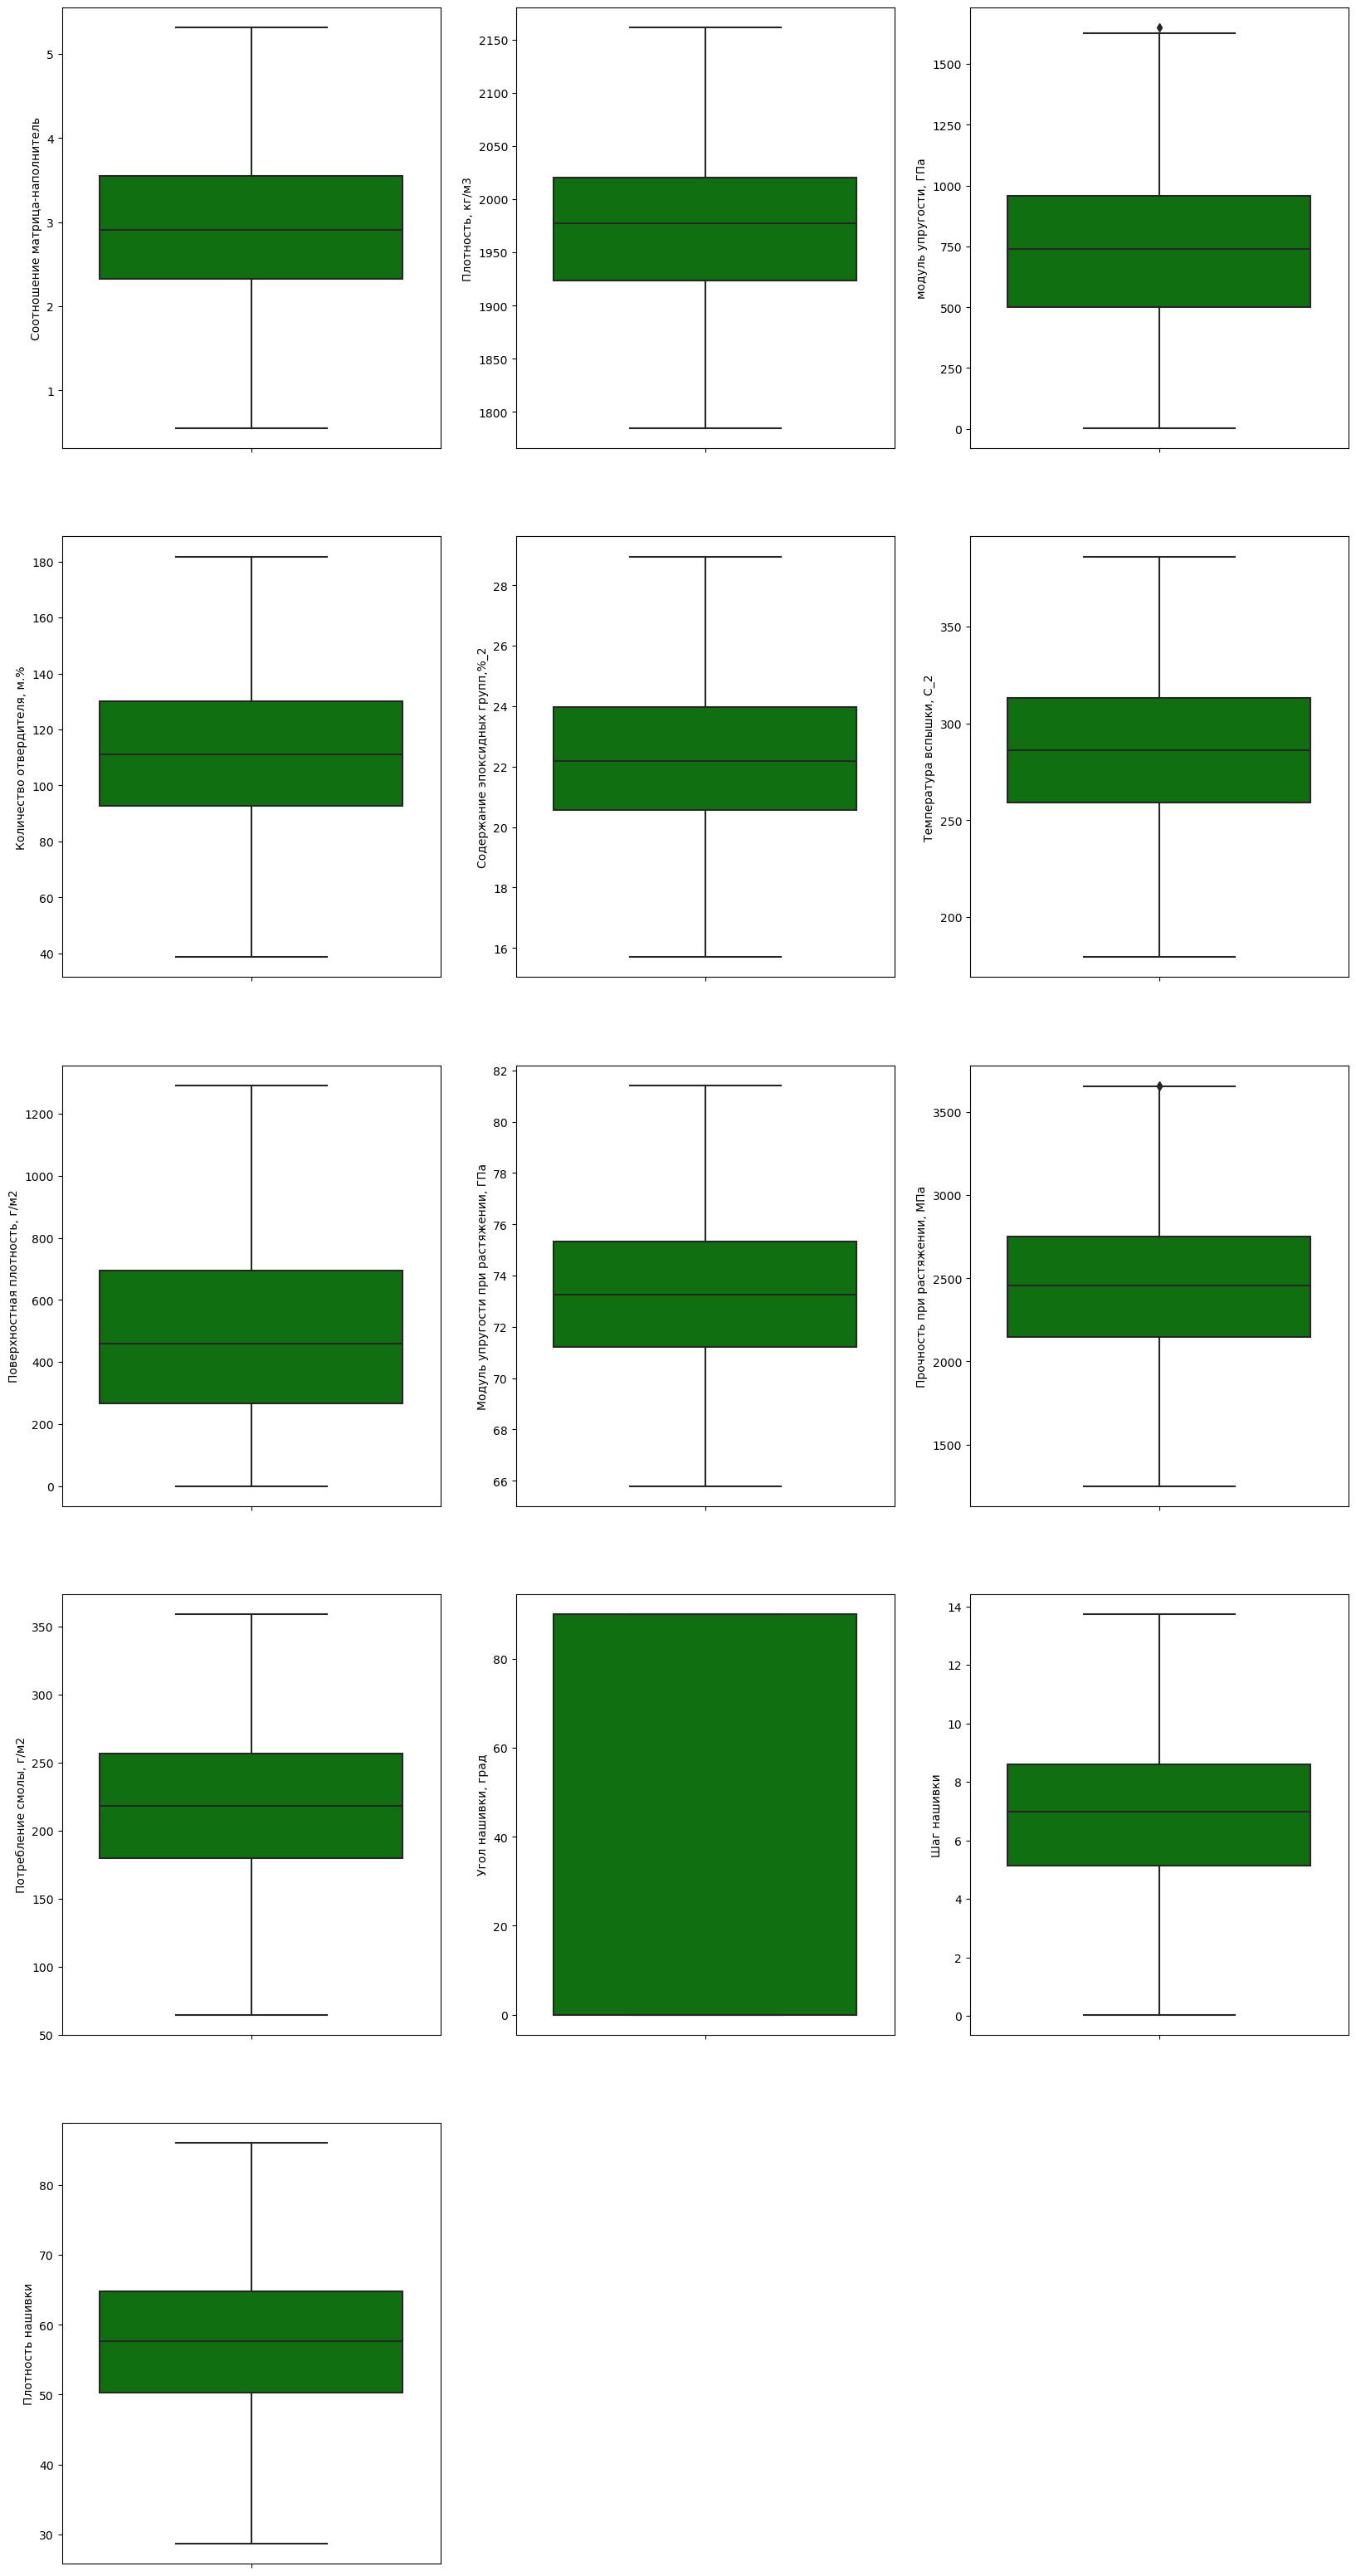

In [15]:
# оценка наличия выбросов и аномальных значений, а также их количества в столбцах очищенного 2 раза датасета
plt.figure(figsize=(20, 40))
i=1 
for name in df_clean.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=df_clean[name], color = 'g')
    outlier = boxplot_stats(df_clean[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

In [16]:
# Осталось небольшое количество выбросов, сделаем очистку 3 раз
print(df_clean.shape)
for name in df_clean.columns:
    outlier = boxplot_stats(df_clean[name])
    High = outlier[0]['whishi']
    Low =  outlier[0]['whislo']
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    df_clean = df_clean[~((df_clean[name] < Low) | (df_clean[name] > High))]
print(df_clean.shape) 

(927, 13)
Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  1
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  1
Количество выбросов в столбце  Прочность при растяжении, МПа :  3
Количество выбросов в столбце  Потребление смолы, г/м2 :  1
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  0
(921, 13)


Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  0
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  0
Количество выбросов в столбце  Потребление смолы, г/м2 :  0
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  0


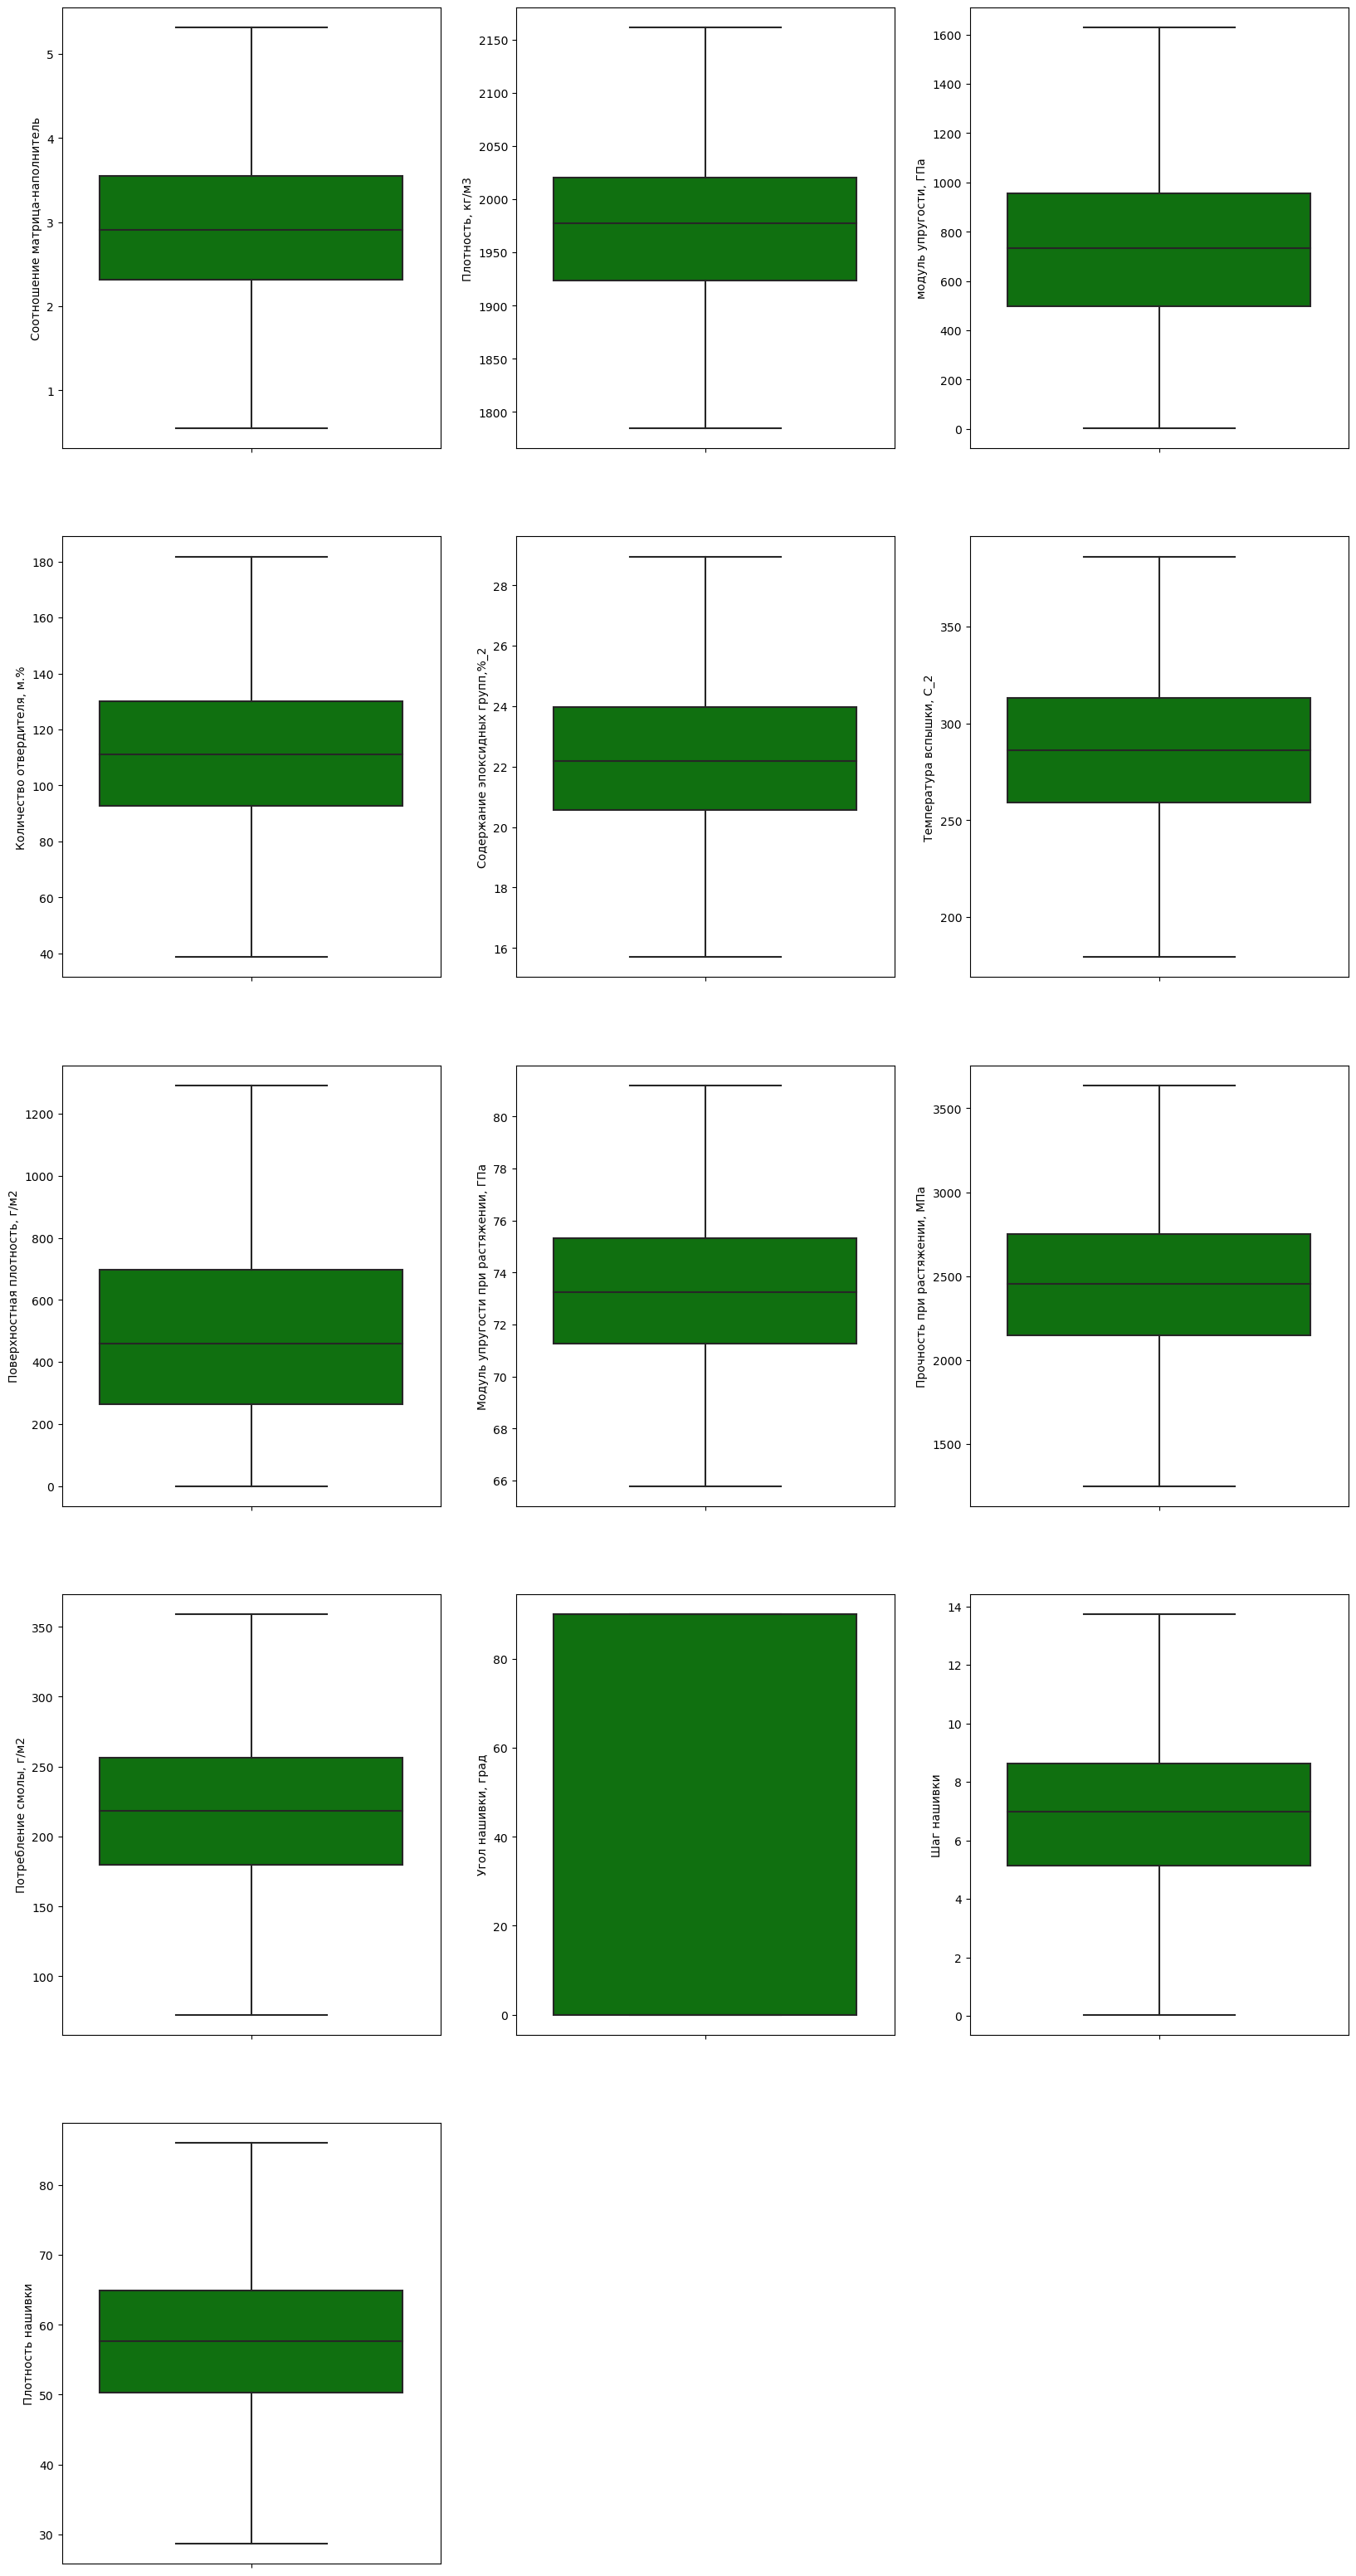

In [17]:
# оценка наличия, количества выбросов в очищенном 3 раза датасете
plt.figure(figsize=(20, 40))
i=1 
for name in df_clean.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=df_clean[name], color = 'g')
    outlier = boxplot_stats(df_clean[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

In [18]:
# Осталось небольшое количество выбросов, сделаем очистку 3 раз
print(df_clean.shape)
for name in df_clean.columns:
    outlier = boxplot_stats(df_clean[name])
    High = outlier[0]['whishi']
    Low =  outlier[0]['whislo']
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    df_clean = df_clean[~((df_clean[name] < Low) | (df_clean[name] > High))]
print(df_clean.shape) 

(921, 13)
Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  0
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  0
Количество выбросов в столбце  Потребление смолы, г/м2 :  0
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  0
(921, 13)


#### Все выбросы удалены, строим итоговую диаграму Boxplot очищенного датасета

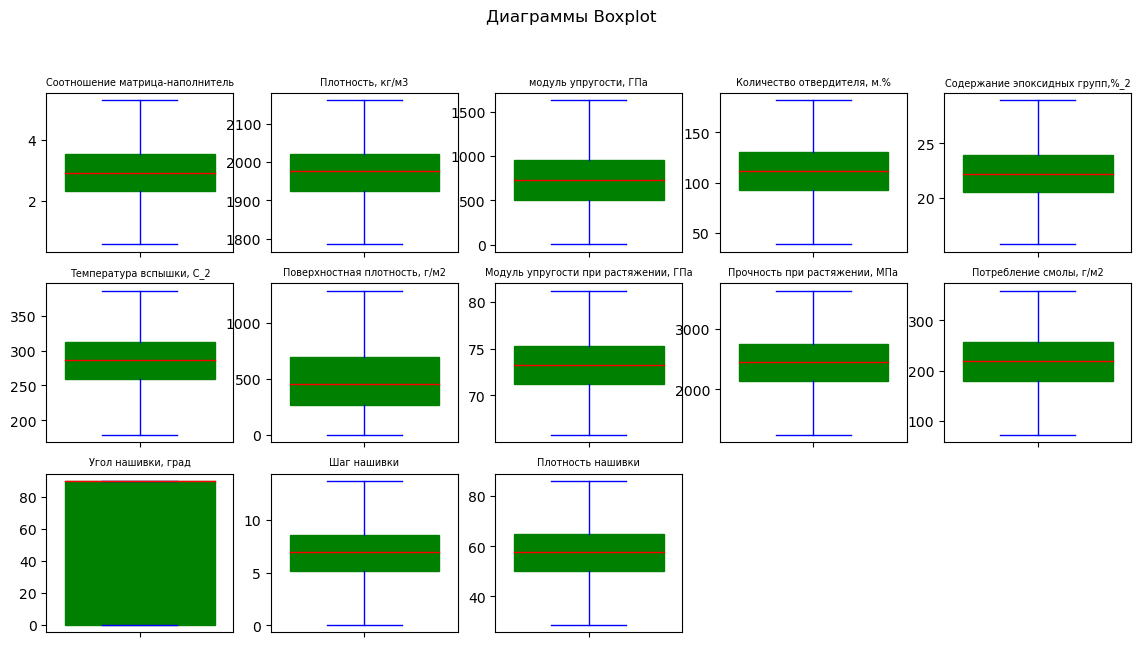

In [19]:
a = 3 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter
plt.figure(figsize = (14,7))
plt.suptitle('Диаграммы Boxplot', y = 1 ,
 fontsize = 12)
for col in df_clean.columns:
    plt.subplot(a, b, c)
    sns.boxplot(data = df_clean, y = df_clean[col], fliersize = 3, linewidth = 1, boxprops = dict(facecolor = 'y', color = 'g'), medianprops = dict(color = 'red'), whiskerprops = dict(color = "b"), capprops = dict(color="blue"), flierprops = dict(color = "y", markeredgecolor = "black"))
    plt.ylabel(None)
    plt.title(col, size = 7)
#plt.show()
    c += 1

In [20]:
# y_clear = X_clear[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]
# X_clear = X_clear.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)

Просмотрим информацию о датасете после удаления выбросов.

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       921 non-null    float64
 1   Плотность, кг/м3                      921 non-null    float64
 2   модуль упругости, ГПа                 921 non-null    float64
 3   Количество отвердителя, м.%           921 non-null    float64
 4   Содержание эпоксидных групп,%_2       921 non-null    float64
 5   Температура вспышки, С_2              921 non-null    float64
 6   Поверхностная плотность, г/м2         921 non-null    float64
 7   Модуль упругости при растяжении, ГПа  921 non-null    float64
 8   Прочность при растяжении, МПа         921 non-null    float64
 9   Потребление смолы, г/м2               921 non-null    float64
 10  Угол нашивки, град                    921 non-null    int64  
 11  Шаг нашивки       

Построим гистограммы распределения каждой из переменных без нормализации

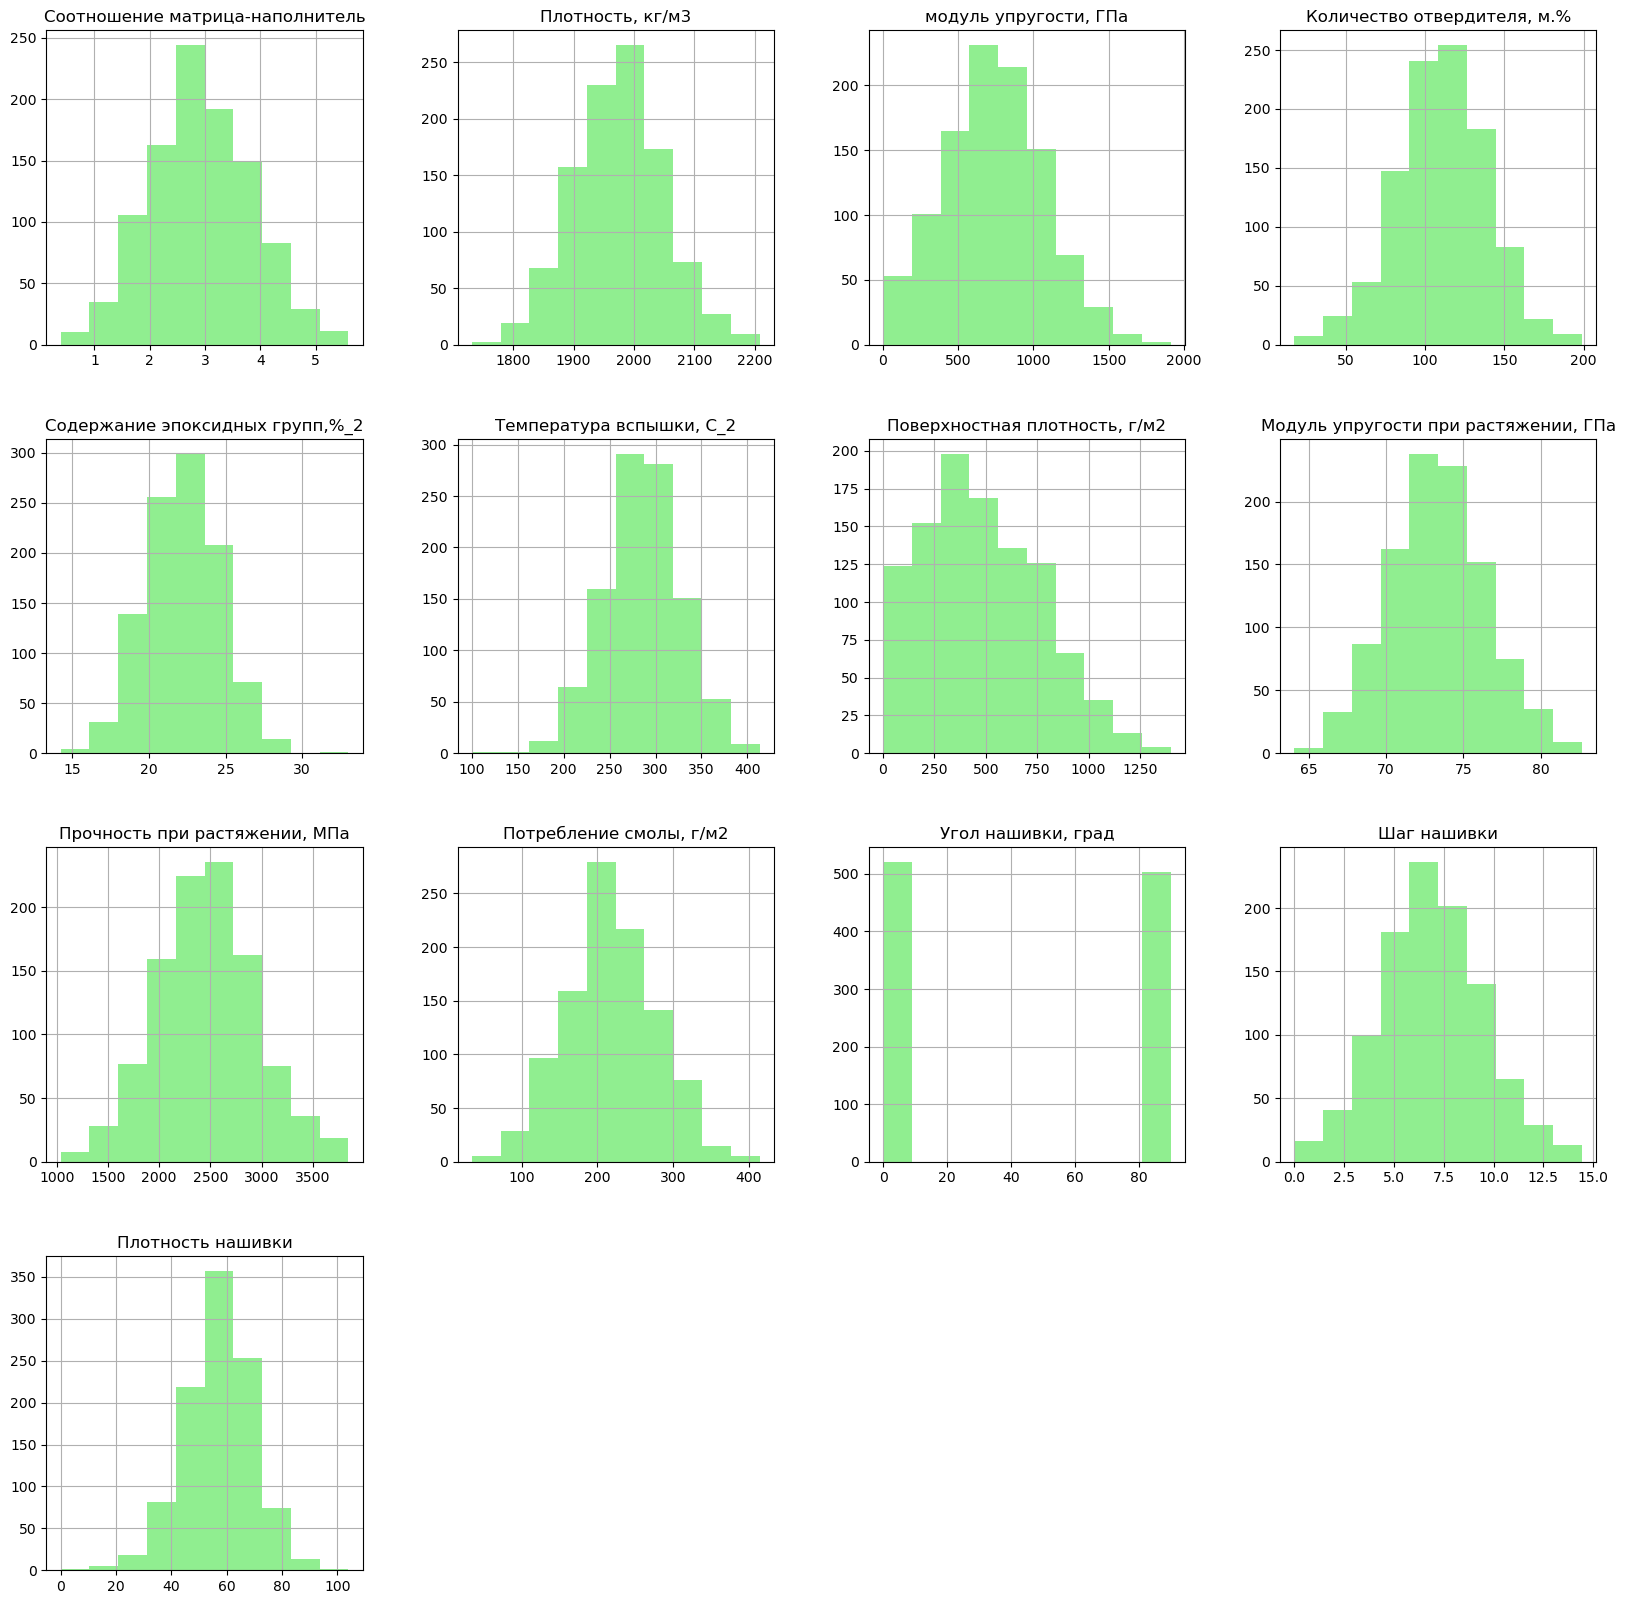

In [22]:
df.hist(figsize = (20,20), color = "lightgreen")
plt.show()

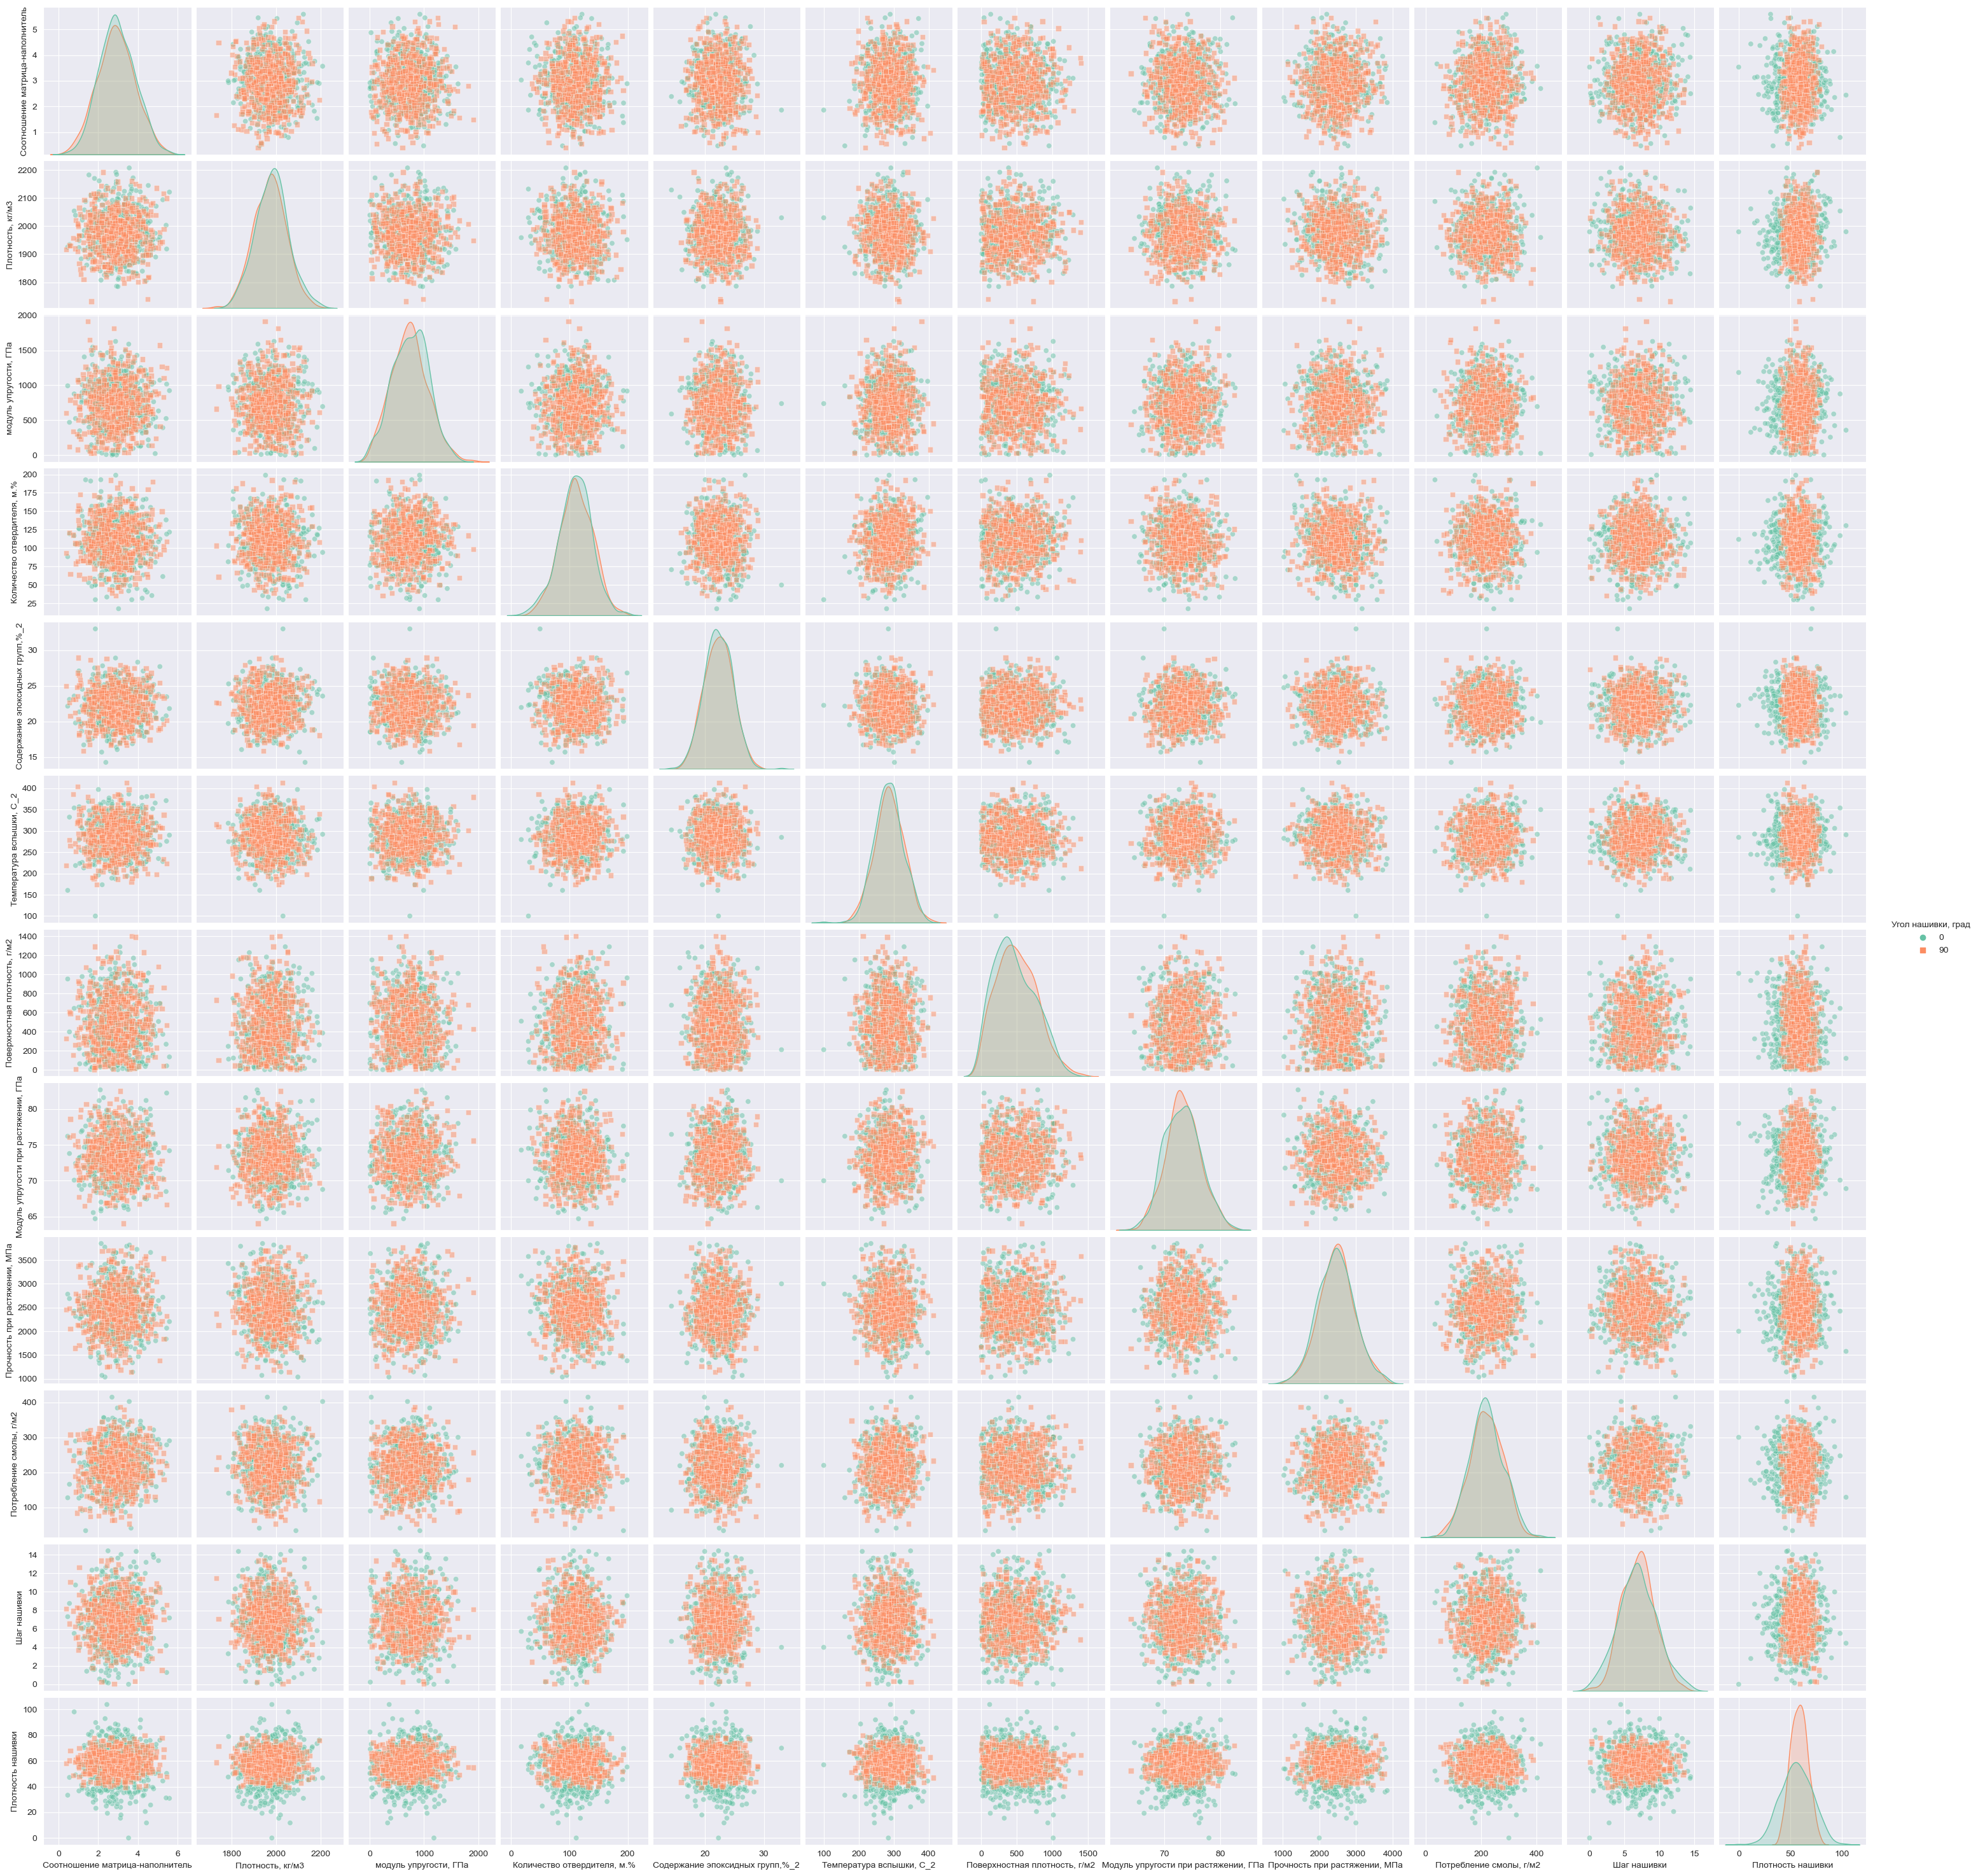

In [23]:
sns.set_style('darkgrid')
sns.pairplot(df, hue = 'Угол нашивки, град', markers = ["o", "s"], diag_kind = 'auto', palette = 'Set2', kind='scatter', plot_kws={'alpha':0.5})


<AxesSubplot:>

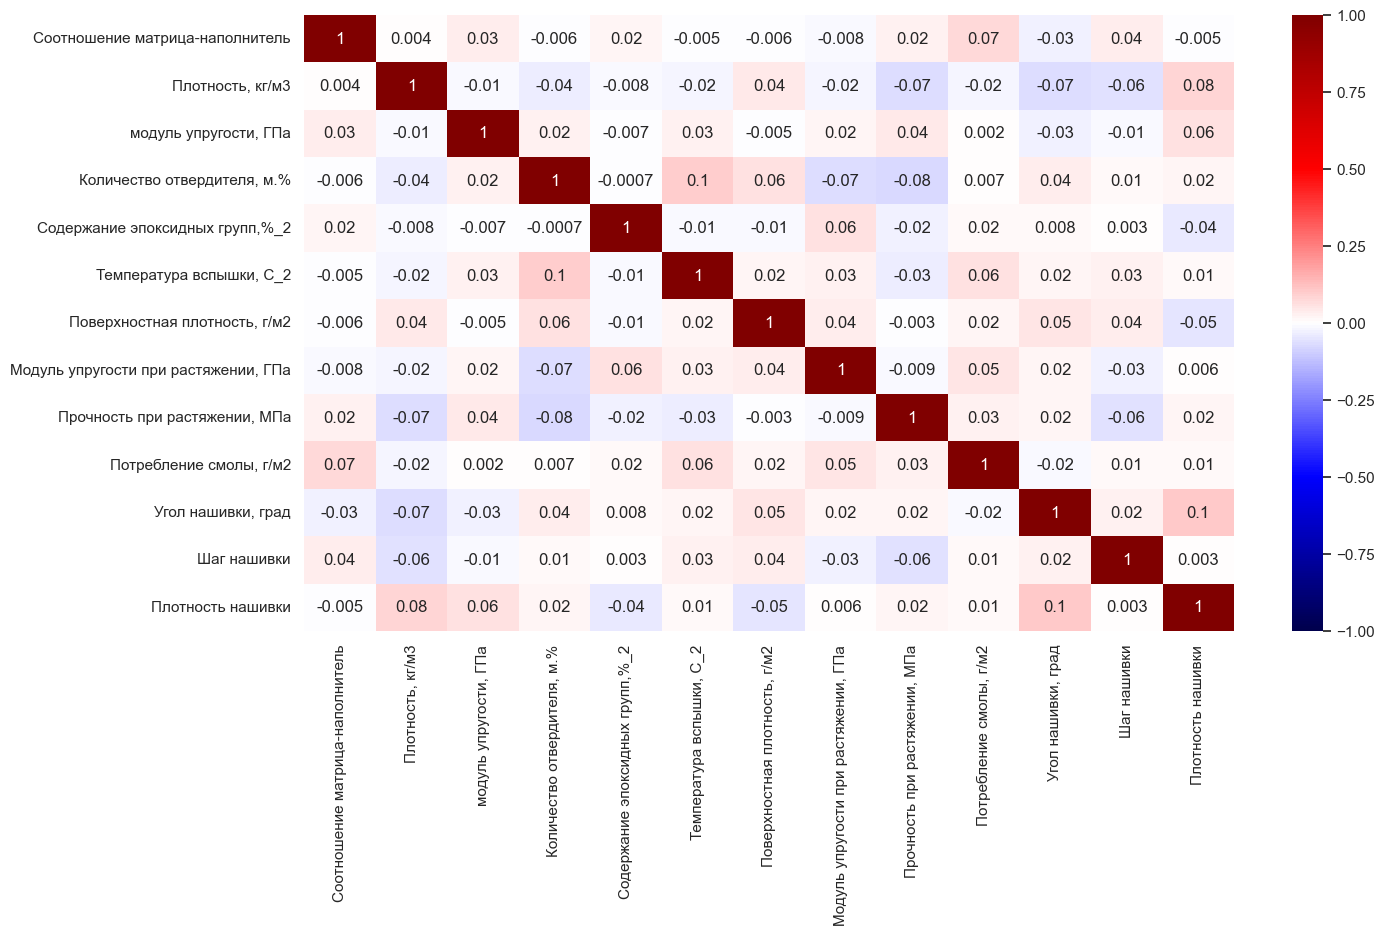

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap = 'seismic')

Сохраняем в файл очищенный датасет

In [25]:
df_clean.to_csv('Datasets\df_clean.csv')

In [26]:
df_clean.corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.008011   
модуль упругости, ГПа                                        0.051680   
Количество отвердителя, м.%                                  0.001350   
Содержание эпоксидных групп,%_2                              0.021984   
Температура вспышки, С_2                                    -0.010586   
Поверхностная плотность, г/м2                                0.011885   
Модуль упругости при растяжении, ГПа                        -0.024342   
Прочность при растяжении, МПа                                0.019282   
Потребление смолы, г/м2                                      0.076976   
Угол нашивки, град                                          -0.032189   
Шаг нашивки                                                  0.039927   
Плотность нашивки                                            0.047829   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.008011               0.051680   
Плотность, кг/м3                              1.000000              -0.001877   
модуль упругости, ГПа                        -0.001877               1.000000   
Количество отвердителя, м.%                  -0.048876               0.044662   
Содержание эпоксидных групп,%_2               0.004527              -0.001502   
Температура вспышки, С_2                     -0.020854               0.038223   
Поверхностная плотность, г/м2                 0.062549              -0.006471   
Модуль упругости при растяжении, ГПа         -0.015178               0.020673   
Прочность при растяжении, МПа                -0.081074               0.028953   
Потребление смолы, г/м2                      -0.010457               0.007202   
Угол нашивки, град                           -0.052423              -0.030660   
Шаг нашивки                                  -0.048716               0.010158   
Плотность нашивки                             0.086880               0.079398   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.001350   
Плотность, кг/м3                                        -0.048876   
модуль упругости, ГПа                                    0.044662   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.011438   
Температура вспышки, С_2                                 0.070554   
Поверхностная плотность, г/м2                            0.038613   
Модуль упругости при растяжении, ГПа                    -0.057133   
Прочность при растяжении, МПа                           -0.065625   
Потребление смолы, г/м2                                 -0.014665   
Угол нашивки, град                                       0.033993   
Шаг нашивки                                             -0.017382   
Плотность нашивки                                        0.007901   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.021984   
Плотность, кг/м3                                             0.004527   
модуль упругости, ГПа                                       -0.001502   
Количество отвердителя, м.%                                  0.011438   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.025268   
Поверхностная плотность, г/м2                               -0.015742   
Модуль упругости при растяжении, ГПа                         0.053957   
Прочность при растяжении, МПа                               -0.013353   
Потребление смолы, г/м2                                      0.010712   
Угол нашивки, град                                           0.034618   
Шаг нашивки                          

Посмотрим на средние и медианные знчения датасета после выбросов.

In [27]:
df_clean.describe()


Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       921.000000        921.000000   
mean                          2.927987       1974.076438   
std                           0.895958         71.067625   
min                           0.547391       1784.482245   
25%                           2.319322       1923.255135   
50%                           2.908787       1977.302956   
75%                           3.550038       2020.108384   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             921.000000                   921.000000   
mean              735.845364                   111.139456   
std               327.678809                    26.767566   
min                 2.436909                    38.668500   
25%               498.519344                    92.834720   
50%               734.763985                   111.166301   
75%               956.906660                   130.163998   
max              1628.000000                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       921.000000                921.000000   
mean                         22.200385                286.210649   
std                           2.395220                 39.431984   
min                          15.695894                179.374391   
25%                          20.555344                259.224491   
50%                          22.177332                286.302097   
75%                          23.957502                313.023467   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     921.000000                            921.000000   
mean                      482.917197                             73.305807   
std                       280.197532                              3.026672   
min                         0.603740                             65.793845   
25%                       264.538975                             71.252628   
50%                       458.556445                             73.253725   
75%                       695.845999                             75.310287   
max                      1291.340115                             81.203147   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     921.000000               921.000000   
mean                     2460.196046               217.961148   
std                       452.101798                57.107510   
min                      1250.392802                72.530873   
25%                      2147.576085               179.858423   
50%                      2455.555556               218.448971   
75%                      2751.228051               256.283235   
max                      3636.892992               359.052220   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          921.000000   921.000000         921.000000  
mean            46.026059     6.931668          57.570720  
std             45.012744     2.515536          11.125702  
min              0.000000     0.037639          28.661632  
25%              0.000000     5.140035          50.273632  
50%             90.000000     6.968698          57.603262  
75%             90.000000     8.613054          64.854936  
max             90.000000    13.732404          86.012427

#### Сделаем стандартизированный датасет

In [28]:
df_std = df_clean.copy()

In [29]:
# стандартизация  данных
scaler_std = StandardScaler()
scaler_std.fit(df_std)
df_std = pd.DataFrame (data =scaler_std.transform(df_std), columns=df_std.columns)

In [30]:
df_std.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -1.195844          0.787334               0.008829   
1                        -1.195844          0.787334               0.008829   
2                        -0.174943          0.787334               0.052380   
3                        -0.178754          0.364971               0.037113   
4                        -0.400199         -0.902116               0.217265   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                    -2.285328                         0.647313   
1                     0.667608                        -0.397000   
2                     0.026933                         0.028185   
3                     0.026933                         0.028185   
4                     0.026933                         0.028185   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 -0.040478                      -0.974546   
1                  0.349890                      -0.974546   
2                 -0.040478                      -0.974546   
3                 -0.040478                      -0.974546   
4                 -0.040478                      -0.974546   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -1.092818                       1.194636   
1                             -1.092818                       1.194636   
2                             -1.092818                       1.194636   
3                             -1.092818                       1.194636   
4                             -1.092818                       1.194636   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.035721           -1.023067    -1.166058           0.218467  
1                 0.035721           -1.023067    -0.768312          -0.950633  
2                 0.035721           -1.023067    -0.768312          -0.051325  
3                 0.035721           -1.023067    -0.768312           0.218467  
4                 0.035721           -1.023067    -0.768312           1.117775

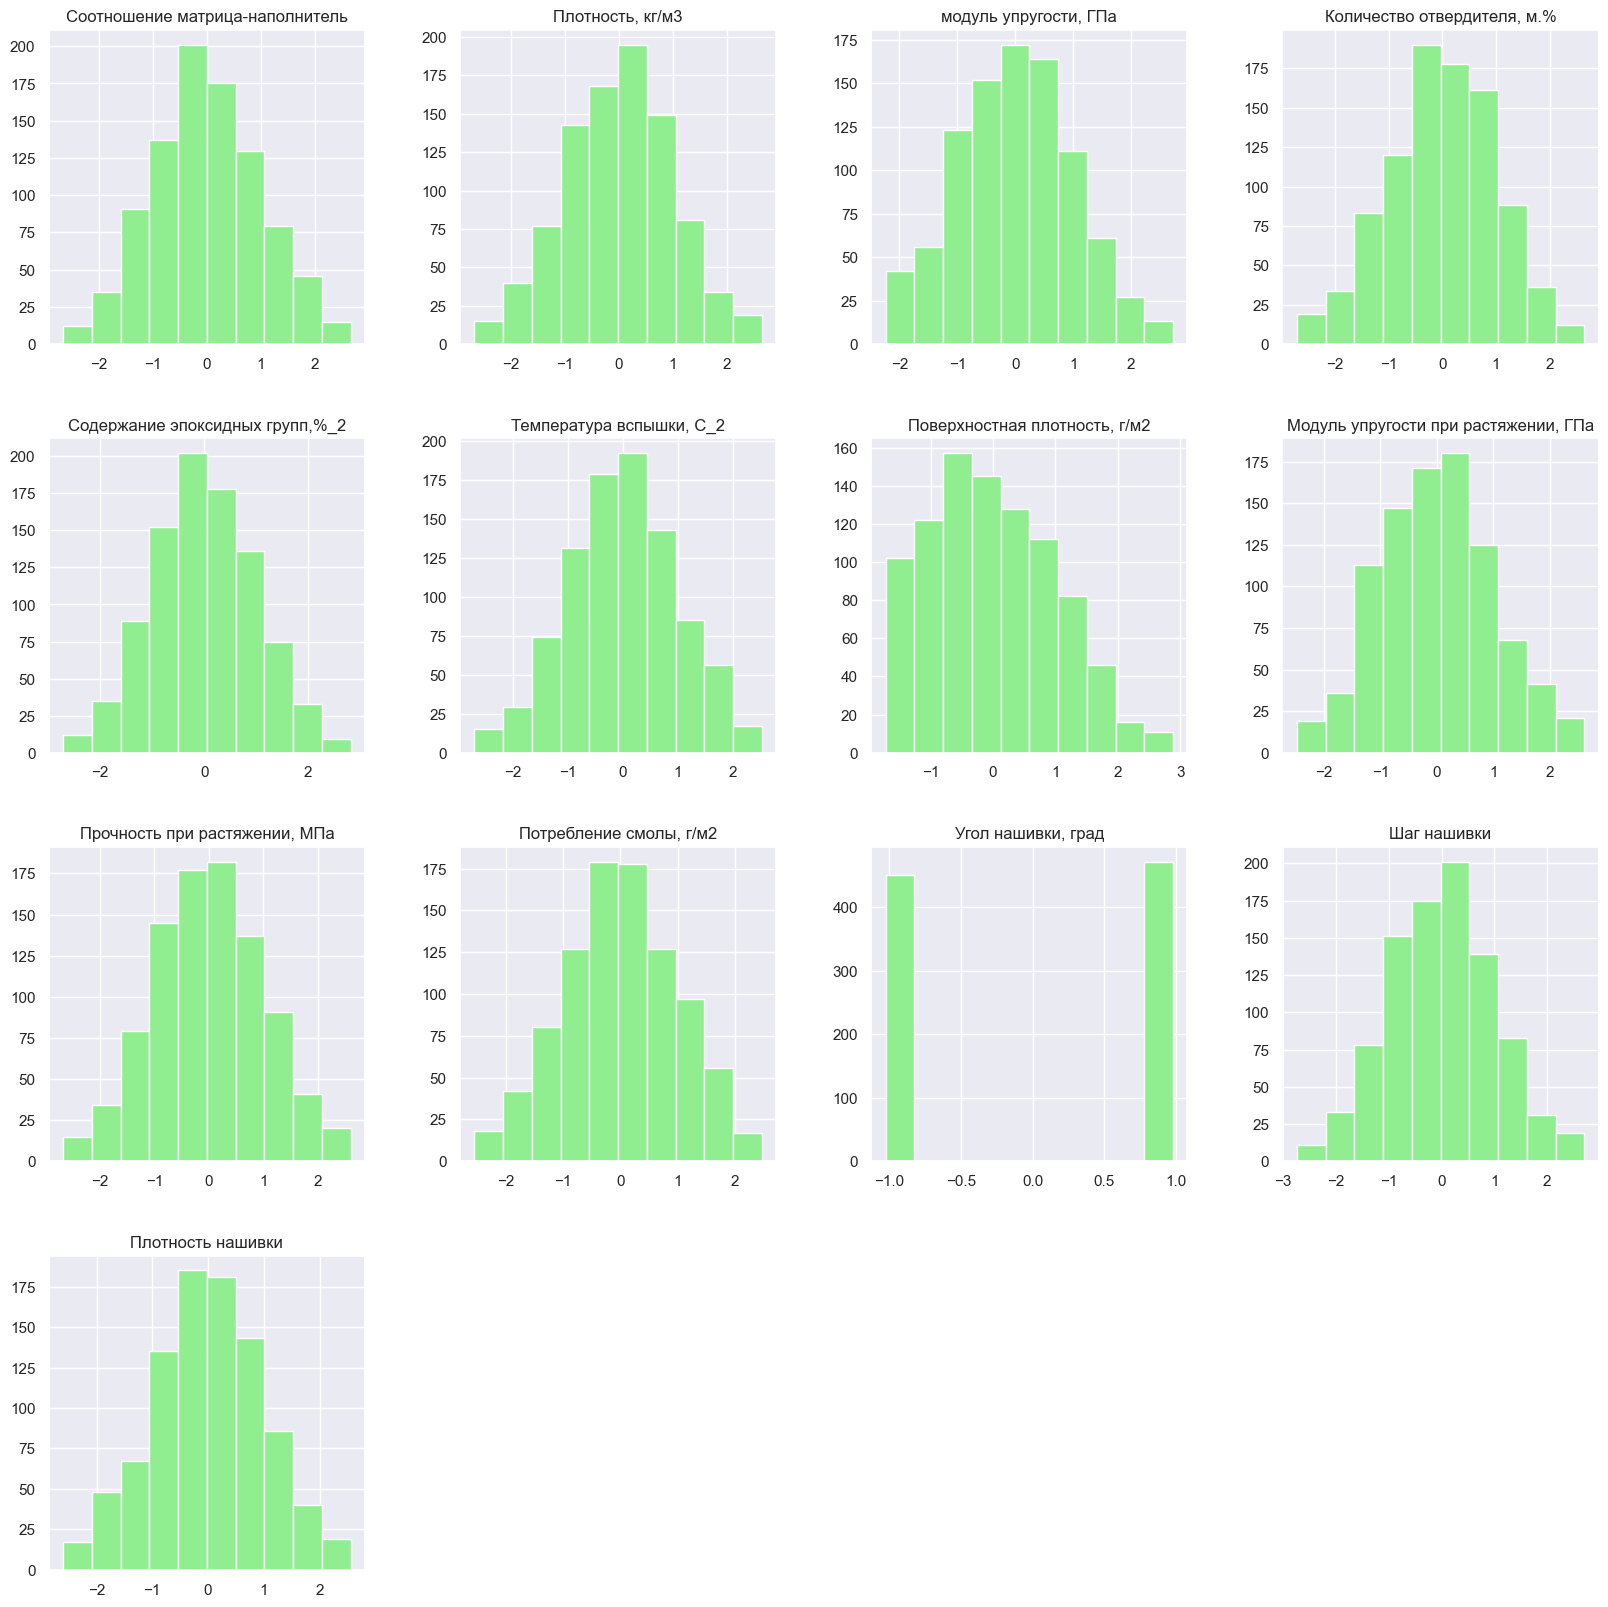

In [31]:
df_std.hist(figsize = (20,20), color = "lightgreen")
plt.show()

#### Сделаем нормализованный датасет (так как некоторые методы плохо работают с отрицательными значениями

In [40]:
df_norm = df_clean.copy()

In [41]:
# нормализация очищенных данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(df_norm)
df_norm = pd.DataFrame (data =scaler_norm.transform(df_norm), columns=df_norm.columns)

In [43]:
df_norm.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.274768          0.651097               0.452951   
1                         0.274768          0.651097               0.452951   
2                         0.466552          0.651097               0.461725   
3                         0.465836          0.571539               0.458649   
4                         0.424236          0.332865               0.494944   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.079153                         0.607435   
1                     0.630983                         0.418887   
2                     0.511257                         0.495653   
3                     0.511257                         0.495653   
4                     0.511257                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.509164                        0.16223   
1                  0.583596                        0.16223   
2                  0.509164                        0.16223   
3                  0.509164                        0.16223   
4                  0.509164                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.272962                       0.733127   
1                              0.272962                       0.733127   
2                              0.272962                       0.733127   
3                              0.272962                       0.733127   
4                              0.272962                       0.733127   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.514688                 0.0     0.289334           0.546433  
1                 0.514688                 0.0     0.362355           0.319758  
2                 0.514688                 0.0     0.362355           0.494123  
3                 0.514688                 0.0     0.362355           0.546433  
4                 0.514688                 0.0     0.362355           0.720799

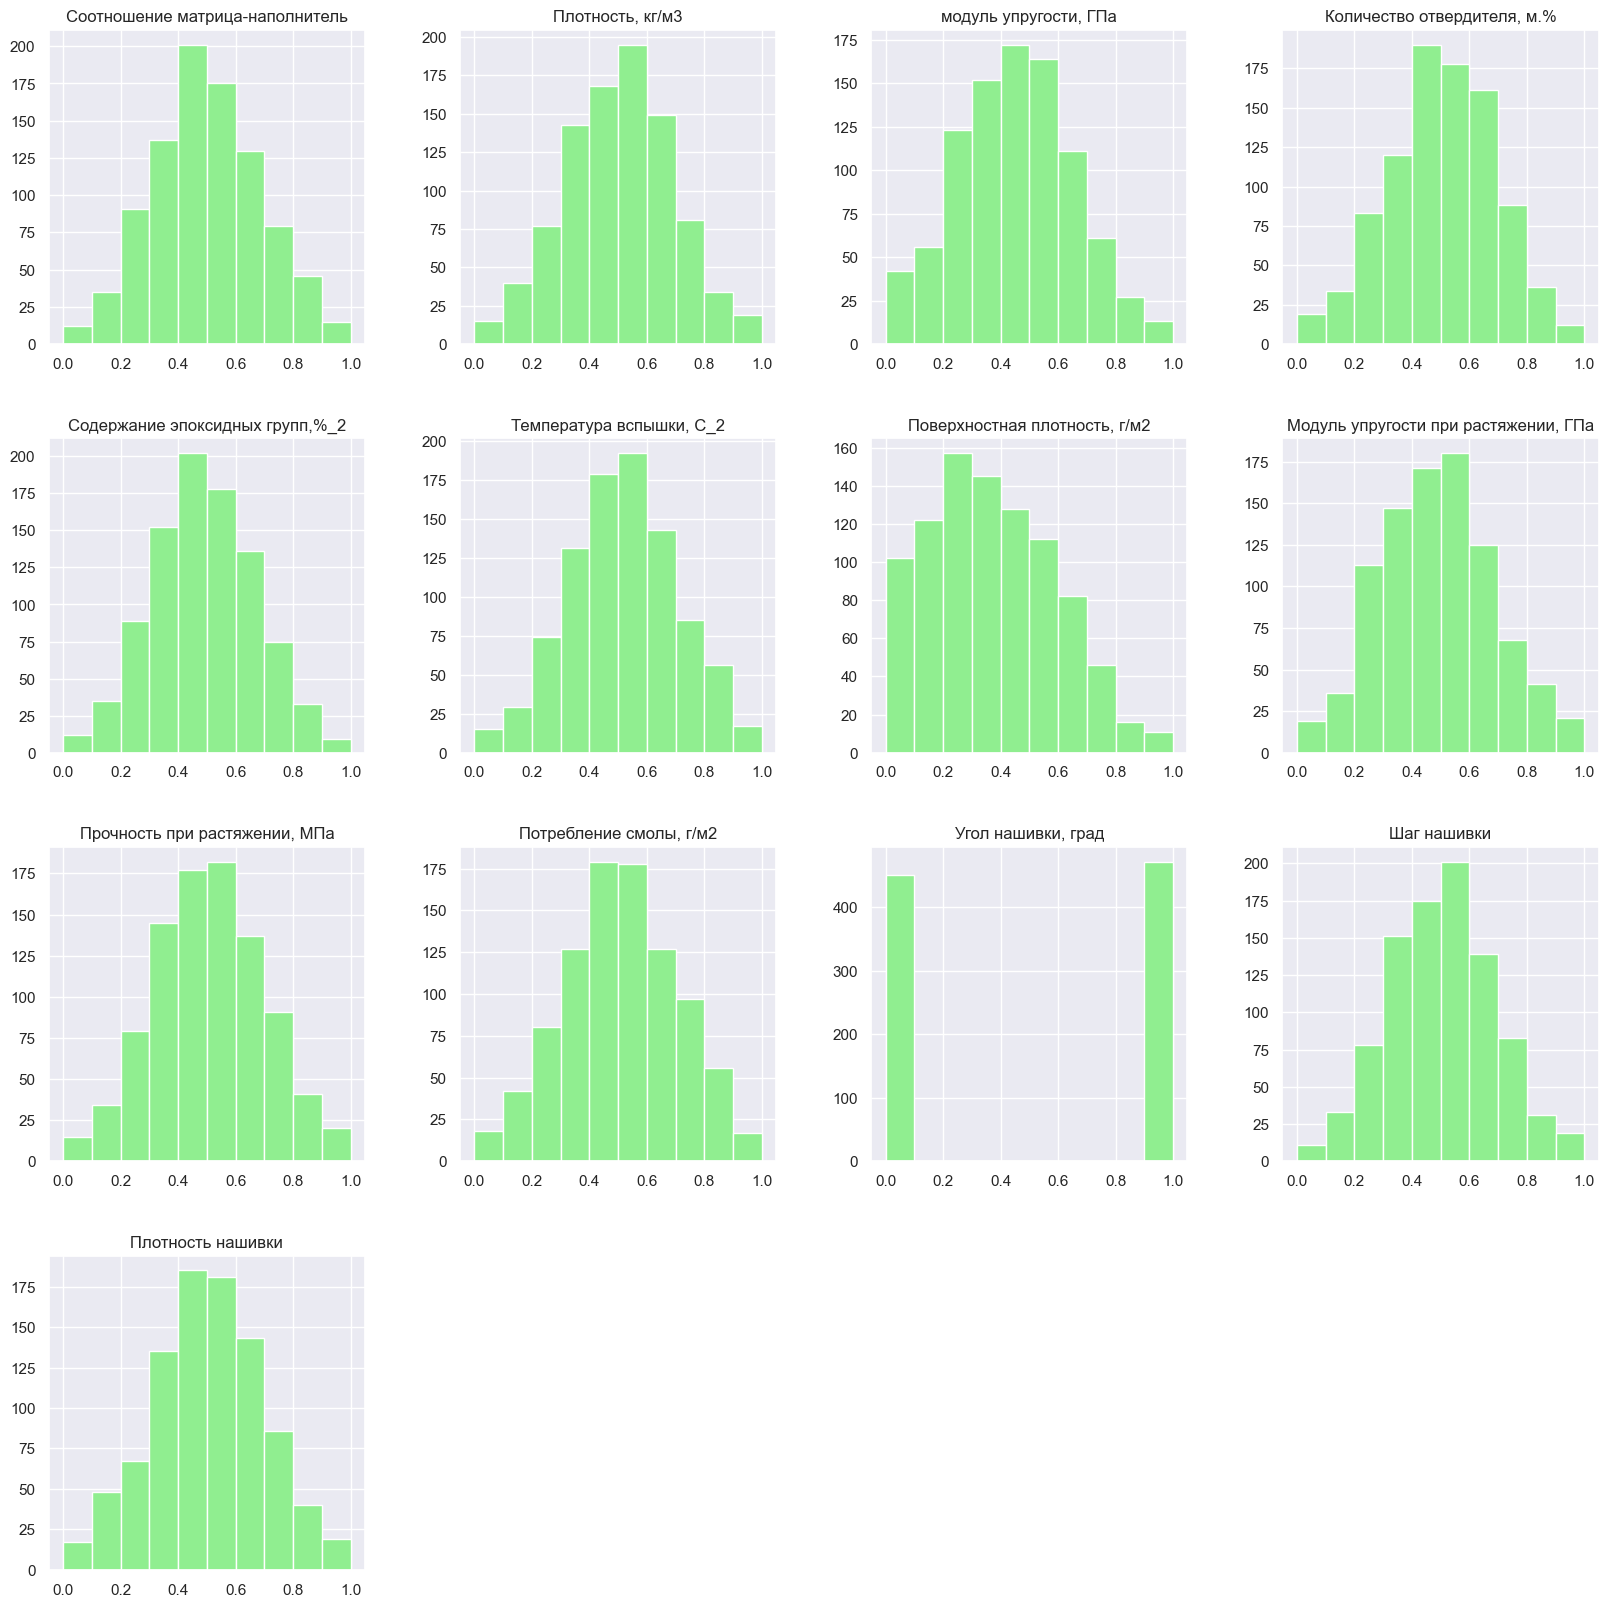

In [44]:
df_norm.hist(figsize = (20,20), color = "lightgreen")
plt.show()

### Проверяем обратный переход от нормализованного и стандартизированного датасетов к исходному

In [45]:
col = df_norm.columns
result_reverse = scaler_norm.inverse_transform(df_norm)
initial_data = pd.DataFrame(result_reverse, columns = col)
initial_data.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         2.771331            2030.0             753.000000   
3                         2.767918            2000.0             748.000000   
4                         2.569620            1910.0             807.000000   
5                         2.561475            1900.0             535.000000   
6                         3.557018            1930.0             889.000000   
7                         3.532338            2100.0            1421.000000   
8                         2.919678            2160.0             933.000000   
9                         2.877358            1990.0            1628.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        50.00                        23.750000   
1                       129.00                        21.250000   
2                       111.86                        22.267857   
3                       111.86                        22.267857   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       129.00                        21.250000   
7                       129.00                        21.250000   
8                       129.00                        21.250000   
9                       129.00                        21.250000   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                284.615385                          210.0   
1                300.000000                          210.0   
2                284.615385                          210.0   
3                284.615385                          210.0   
4                284.615385                          210.0   
5                284.615385                          380.0   
6                300.000000                          380.0   
7                300.000000                         1010.0   
8                300.000000                         1010.0   
9                300.000000                         1010.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  75.0                         1800.0   
6                                  75.0                         1800.0   
7                                  78.0                         2000.0   
8                                  78.0                         2000.0   
9                                  78.0                         2000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               60.0  
1                    220.0                 0.0          5.0               47.0  
2                    220.0                 0.0          5.0               57.0  
3                    220.0                 0.0          5.0               60.0  
4                    220.0                 0.0          5.0               70.0  
5                    120.0                 0.0          7.0               47.0  
6                    120.0                 0.0          7.0               57.0  
7                    300.0                 0.0          7.0               60.0  
8                    300.0                 0.0          7.0               70.0  
9                    300.0                 0.0          9.0               47.0

In [46]:
col = df_std.columns
result_reverse1 = scaler_std.inverse_transform(df_std)
initial_data1 = pd.DataFrame(result_reverse1, columns = col)
initial_data1.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         2.771331            2030.0             753.000000   
3                         2.767918            2000.0             748.000000   
4                         2.569620            1910.0             807.000000   
5                         2.561475            1900.0             535.000000   
6                         3.557018            1930.0             889.000000   
7                         3.532338            2100.0            1421.000000   
8                         2.919678            2160.0             933.000000   
9                         2.877358            1990.0            1628.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        50.00                        23.750000   
1                       129.00                        21.250000   
2                       111.86                        22.267857   
3                       111.86                        22.267857   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       129.00                        21.250000   
7                       129.00                        21.250000   
8                       129.00                        21.250000   
9                       129.00                        21.250000   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                284.615385                          210.0   
1                300.000000                          210.0   
2                284.615385                          210.0   
3                284.615385                          210.0   
4                284.615385                          210.0   
5                284.615385                          380.0   
6                300.000000                          380.0   
7                300.000000                         1010.0   
8                300.000000                         1010.0   
9                300.000000                         1010.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  75.0                         1800.0   
6                                  75.0                         1800.0   
7                                  78.0                         2000.0   
8                                  78.0                         2000.0   
9                                  78.0                         2000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0       -7.105427e-15          4.0               60.0  
1                    220.0       -7.105427e-15          5.0               47.0  
2                    220.0       -7.105427e-15          5.0               57.0  
3                    220.0       -7.105427e-15          5.0               60.0  
4                    220.0       -7.105427e-15          5.0               70.0  
5                    120.0       -7.105427e-15          7.0               47.0  
6                    120.0       -7.105427e-15          7.0               57.0  
7                    300.0       -7.105427e-15          7.0               60.0  
8                    300.0       -7.105427e-15          7.0               70.0  
9                    300.0       -7.105427e-15          9.0               47.0

#### Запишем нормализованный и стандартизированный датасет в файлы

In [47]:
df_std.to_csv('Datasets\df_std.csv')

In [48]:
df_norm.to_csv('Datasets\df_norm.csv')